In [1]:
%matplotlib inline
import sys
sys.path.append('..')
from preamble import *

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

print()

# we rename the classes "blue" and "red" for illustration bpurposes:
y_named = np.array(["blue", "red"])[y]
print("Named Target shape: {}".format(y_named.shape))
print(y[0], y_named[0])
print(y[1], y_named[1])
print(y[2], y_named[2])

Data shape: (100, 2)
Target shape: (100,)

Named Target shape: (100,)
1 red
1 red
0 blue


In [3]:
from sklearn.model_selection import train_test_split

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [4]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

print()

# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)))

Shape of probabilities: (25, 2)

Predicted probabilities:
[[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]
 [1.    0.   ]
 [0.016 0.984]
 [0.248 0.752]
 [0.032 0.968]
 [0.998 0.002]
 [0.014 0.986]
 [0.02  0.98 ]
 [0.769 0.231]
 [0.025 0.975]
 [0.985 0.015]
 [0.774 0.226]
 [0.98  0.02 ]
 [0.017 0.983]
 [0.016 0.984]
 [0.016 0.984]
 [0.341 0.659]
 [0.063 0.937]
 [0.934 0.066]
 [0.866 0.134]]


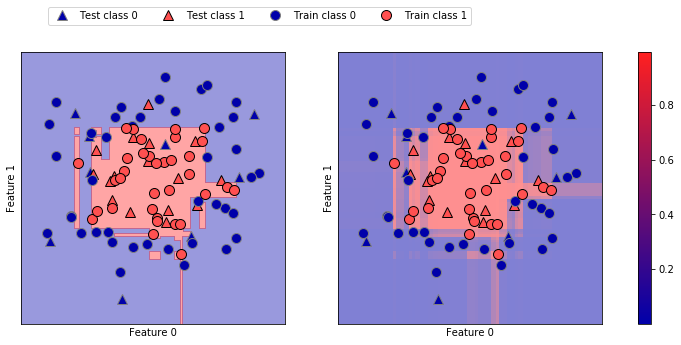

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))